<a href="https://colab.research.google.com/github/Niwanka/footballPrediction/blob/main/copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:

#Import necessary library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from collections import Counter
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from scipy.stats import uniform
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [152]:
data_frame = pd.read_csv('https://raw.githubusercontent.com/Niwanka/footballPrediction/refs/heads/main/PremierLeague.csv')

In [153]:
data_frame

,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,HalfTimeHomeTeamGoals,...,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints
0,1993-1994,1,14/08/1993,NaN,Arsenal,Coventry,0,3,A,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
1,1993-1994,1,14/08/1993,NaN,Aston Villa,QPR,4,1,H,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
2,1993-1994,1,14/08/1993,NaN,Chelsea,Blackburn,1,2,A,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
3,1993-1994,1,14/08/1993,NaN,Liverpool,Sheffield Weds,2,0,H,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
4,1993-1994,1,14/08/1993,NaN,Man City,Leeds,1,1,D,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11775,2023-2024,38,19/05/2024,04:00:00 p. m.,Crystal Palace,Aston Villa,5,0,H,2.0,...,3.84,1.87,4.28,3.67,1.42,3.12,1.39,2.96,3,0
11776,2023-2024,38,19/05/2024,04:00:00 p. m.,Liverpool,Wolves,2,0,H,2.0,...,17.00,1.16,8.71,14.55,1.24,4.55,1.22,4.23,3,0
11777,2023-2024,38,19/05/2024,04:00:00 p. m.,Luton,Fulham,2,4,A,1.0,...,2.30,2.92,3.95,2.23,1.48,2.86,1.44,2.76,0,3
11778,2023-2024,38,19/05/2024,04:00:00 p. m.,Man City,West Ham,3,1,H,2.0,...,25.00,1.10,11.72,21.81,1.22,4.85,1.20,4.45,3,0


In [154]:
data_frame['Date'] = pd.to_datetime(data_frame['Date'], format='%d/%m/%Y')


filtered_data_frame = data_frame[data_frame['Date'] > '2000-01-01']

filtered_data_frame.head()

,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,HalfTimeHomeTeamGoals,...,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints
2475,1999-2000,19,2000-01-03,NaN,Derby,Watford,2,0,H,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
2476,1999-2000,19,2000-01-03,NaN,Everton,Leicester,2,2,D,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2477,1999-2000,19,2000-01-03,NaN,Leeds,Aston Villa,1,2,A,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
2478,1999-2000,19,2000-01-03,NaN,Newcastle,West Ham,2,2,D,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2479,1999-2000,19,2000-01-03,NaN,Sheffield Weds,Arsenal,1,1,D,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1


In [155]:
filtered_data_frame['Date'] = pd.to_datetime(filtered_data_frame['Date'])
filtered_data_frame['Year'] = filtered_data_frame['Date'].dt.year
filtered_data_frame['Month'] = filtered_data_frame['Date'].dt.month

<ipython-input-155-cc8c4d44936c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_frame['Date'] = pd.to_datetime(filtered_data_frame['Date'])
<ipython-input-155-cc8c4d44936c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_frame['Year'] = filtered_data_frame['Date'].dt.year
<ipython-input-155-cc8c4d44936c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

<ipython-input-156-fdcefd6fe0cb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='MatchCount', data=matches_per_year, palette='Blues_d')


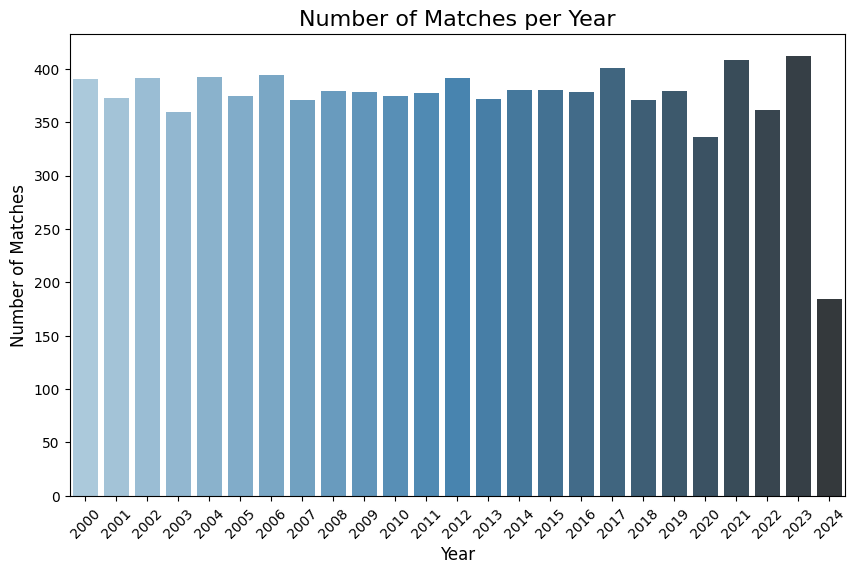

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by the 'Year' column and count the number of matches per year
matches_per_year = filtered_data_frame.groupby('Year').size().reset_index(name='MatchCount')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='MatchCount', data=matches_per_year, palette='Blues_d')

# Add labels and title
plt.title('Number of Matches per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.show()

In [157]:
filtered_data_frame = filtered_data_frame.drop('Date', axis=1)

In [158]:
columns = [
    'Season', 'MatchWeek', 'Year', 'Month', 'Time', 'HomeTeam', 'AwayTeam',
    'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals',
    'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals', 'HalfTimeResult',
    'Referee', 'HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget',
    'AwayTeamShotsOnTarget', 'HomeTeamCorners', 'AwayTeamCorners',
    'HomeTeamFouls', 'AwayTeamFouls', 'HomeTeamYellowCards', 'AwayTeamYellowCards',
    'HomeTeamRedCards', 'AwayTeamRedCards', 'B365HomeTeam', 'B365Draw',
    'B365AwayTeam', 'B365Over2.5Goals', 'B365Under2.5Goals', 'MarketMaxHomeTeam',
    'MarketMaxDraw', 'MarketMaxAwayTeam', 'MarketAvgHomeTeam', 'MarketAvgDraw',
    'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals', 'MarketMaxUnder2.5Goals',
    'MarketAvgOver2.5Goals', 'MarketAvgUnder2.5Goals', 'HomeTeamPoints', 'AwayTeamPoints','FullTimeResult'
]

In [159]:
filtered_data_frame = filtered_data_frame[columns]

In [160]:
filtered_data_frame.shape

(9305, 43)

In [161]:
filtered_data_frame.columns

Index(['Season', 'MatchWeek', 'Year', 'Month', 'Time', 'HomeTeam', 'AwayTeam',
       'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals',
       'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals', 'HalfTimeResult',
       'Referee', 'HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget',
       'AwayTeamShotsOnTarget', 'HomeTeamCorners', 'AwayTeamCorners',
       'HomeTeamFouls', 'AwayTeamFouls', 'HomeTeamYellowCards',
       'AwayTeamYellowCards', 'HomeTeamRedCards', 'AwayTeamRedCards',
       'B365HomeTeam', 'B365Draw', 'B365AwayTeam', 'B365Over2.5Goals',
       'B365Under2.5Goals', 'MarketMaxHomeTeam', 'MarketMaxDraw',
       'MarketMaxAwayTeam', 'MarketAvgHomeTeam', 'MarketAvgDraw',
       'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals', 'MarketMaxUnder2.5Goals',
       'MarketAvgOver2.5Goals', 'MarketAvgUnder2.5Goals', 'HomeTeamPoints',
       'AwayTeamPoints', 'FullTimeResult'],
      dtype='object')

In [162]:
filtered_data_frame

,Season,MatchWeek,Year,Month,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,HalfTimeHomeTeamGoals,...,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints,FullTimeResult
2475,1999-2000,19,2000,1,NaN,Derby,Watford,2,0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,H
2476,1999-2000,19,2000,1,NaN,Everton,Leicester,2,2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,D
2477,1999-2000,19,2000,1,NaN,Leeds,Aston Villa,1,2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,A
2478,1999-2000,19,2000,1,NaN,Newcastle,West Ham,2,2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,D
2479,1999-2000,19,2000,1,NaN,Sheffield Weds,Arsenal,1,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11775,2023-2024,38,2024,5,04:00:00 p. m.,Crystal Palace,Aston Villa,5,0,2.0,...,1.87,4.28,3.67,1.42,3.12,1.39,2.96,3,0,H
11776,2023-2024,38,2024,5,04:00:00 p. m.,Liverpool,Wolves,2,0,2.0,...,1.16,8.71,14.55,1.24,4.55,1.22,4.23,3,0,H
11777,2023-2024,38,2024,5,04:00:00 p. m.,Luton,Fulham,2,4,1.0,...,2.92,3.95,2.23,1.48,2.86,1.44,2.76,0,3,A
11778,2023-2024,38,2024,5,04:00:00 p. m.,Man City,West Ham,3,1,2.0,...,1.10,11.72,21.81,1.22,4.85,1.20,4.45,3,0,H


In [163]:
null_counts = filtered_data_frame.isnull().sum()
null_counts

,0
Season,0
MatchWeek,0
Year,0
Month,0
Time,7405
HomeTeam,0
AwayTeam,0
FullTimeHomeTeamGoals,0
FullTimeAwayTeamGoals,0
HalfTimeHomeTeamGoals,0


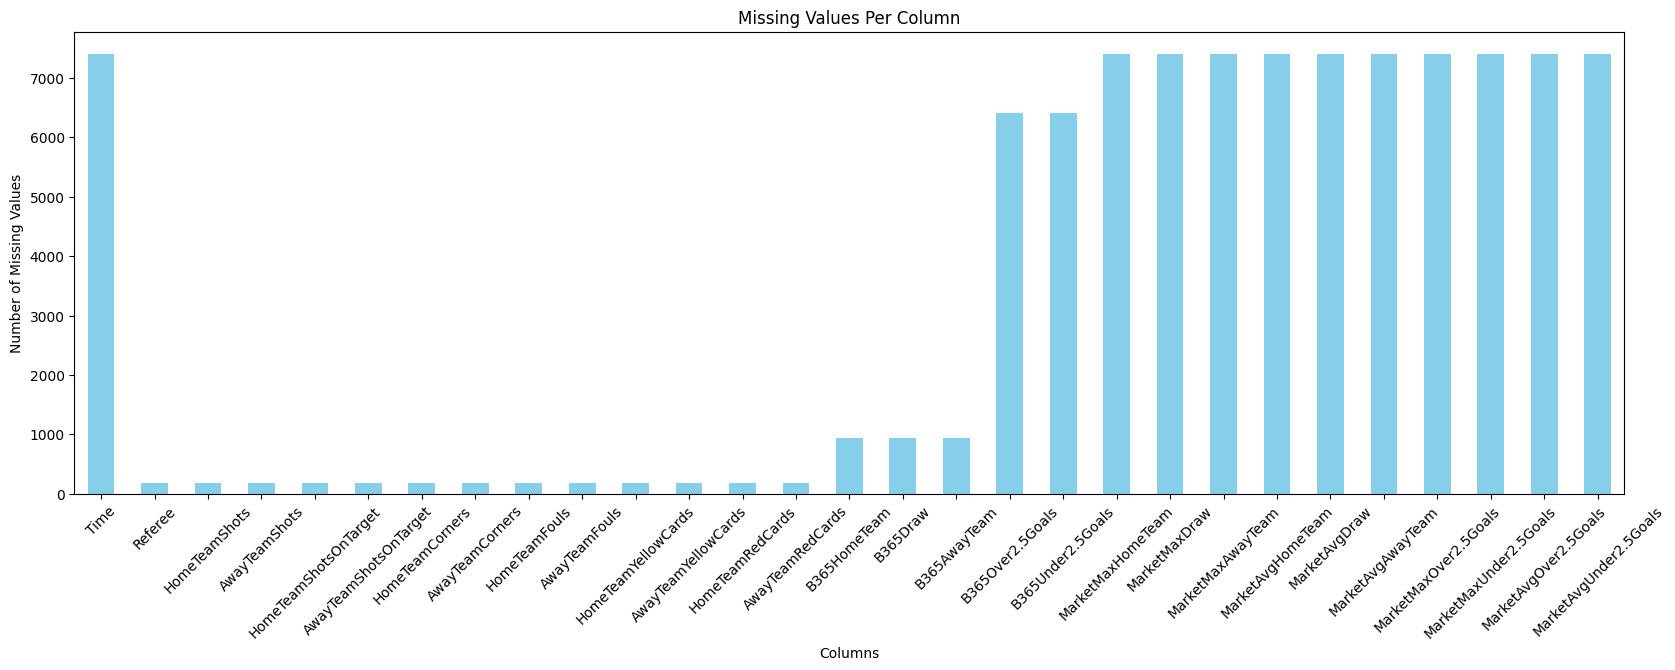

In [164]:
# Count missing values in each column
missing_values = filtered_data_frame.isnull().sum()

# Filter out columns with no missing values
missing_values = missing_values[missing_values > 0]

# Plotting the bar chart for missing values
plt.figure(figsize=(20, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title("Missing Values Per Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.show()

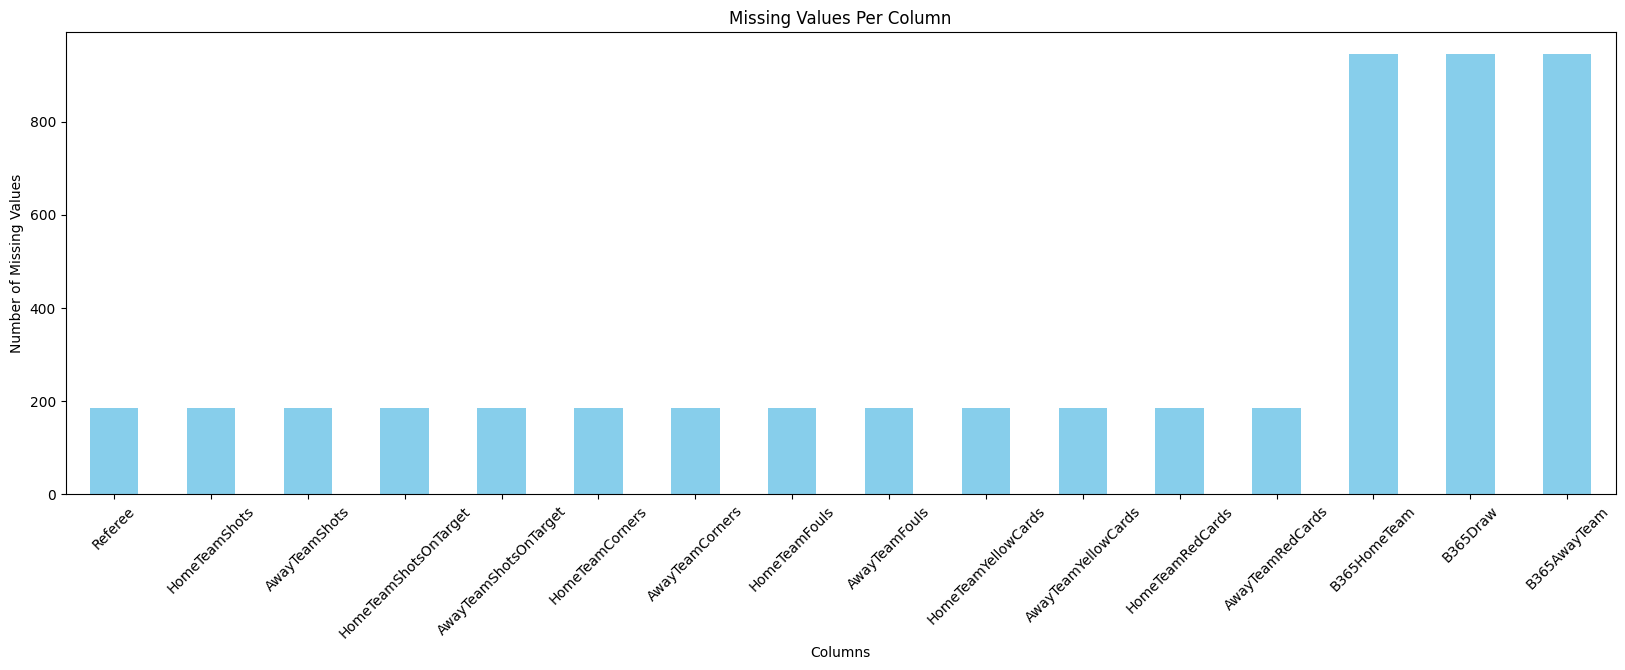

In [165]:
null_counts = filtered_data_frame.isnull().sum()

columns_to_drop = null_counts[null_counts > 6000].index


filtered_data_frame.drop(columns=columns_to_drop, axis=1, inplace=True)

# Count missing values in each column
missing_values = filtered_data_frame.isnull().sum()

# Filter out columns with no missing values
missing_values = missing_values[missing_values > 0]

# Plotting the bar chart for missing values
plt.figure(figsize=(20, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title("Missing Values Per Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.show()

In [166]:
filtered_data_frame = filtered_data_frame.dropna()
filtered_data_frame.isnull().sum()

,0
Season,0
MatchWeek,0
Year,0
Month,0
HomeTeam,0
AwayTeam,0
FullTimeHomeTeamGoals,0
FullTimeAwayTeamGoals,0
HalfTimeHomeTeamGoals,0
HalfTimeAwayTeamGoals,0


In [167]:
filtered_data_frame

,Season,MatchWeek,Year,Month,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,...,HomeTeamYellowCards,AwayTeamYellowCards,HomeTeamRedCards,AwayTeamRedCards,B365HomeTeam,B365Draw,B365AwayTeam,HomeTeamPoints,AwayTeamPoints,FullTimeResult
3420,2002-2003,1,2002,8,Blackburn,Sunderland,0,0,0.0,0.0,...,1.0,2.0,0.0,0.0,1.727,3.25,4.333,1,1,D
3421,2002-2003,1,2002,8,Charlton,Chelsea,2,3,2.0,1.0,...,0.0,3.0,1.0,0.0,2.800,3.25,2.200,0,3,A
3422,2002-2003,1,2002,8,Everton,Tottenham,2,2,1.0,0.0,...,1.0,1.0,0.0,0.0,2.250,3.25,2.750,1,1,D
3423,2002-2003,1,2002,8,Fulham,Bolton,4,1,3.0,1.0,...,1.0,2.0,0.0,0.0,1.727,3.25,4.333,3,0,H
3424,2002-2003,1,2002,8,Leeds,Man City,3,0,2.0,0.0,...,1.0,1.0,0.0,0.0,1.667,3.40,4.500,3,0,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11775,2023-2024,38,2024,5,Crystal Palace,Aston Villa,5,0,2.0,0.0,...,1.0,4.0,0.0,0.0,1.850,4.33,3.600,3,0,H
11776,2023-2024,38,2024,5,Liverpool,Wolves,2,0,2.0,0.0,...,1.0,1.0,0.0,1.0,1.170,8.00,15.000,3,0,H
11777,2023-2024,38,2024,5,Luton,Fulham,2,4,1.0,2.0,...,5.0,4.0,0.0,0.0,2.900,3.90,2.200,0,3,A
11778,2023-2024,38,2024,5,Man City,West Ham,3,1,2.0,1.0,...,0.0,1.0,0.0,0.0,1.080,12.00,21.000,3,0,H


In [168]:
# Reset the index to avoid KeyError
filtered_data_frame.reset_index(drop=True, inplace=True)

# Function to calculate form for a team before a given match
def calculate_team_form_before_match(df, team, match_index, location, num_matches=5):
    """
    Calculate form for a team (home or away) before a specific match.

    Args:
    df (DataFrame): The full dataframe of match results.
    team (str): The team for which to calculate form.
    match_index (int): The index of the match for which we are calculating form.
    location (str): Either 'Home' or 'Away' to specify team type.
    num_matches (int): Number of previous matches to calculate form over.

    Returns:
    int: Form score based on the last 'num_matches' games before the match.
    """
    if location == 'Home':
        team_matches = df[(df['HomeTeam'] == team) & (df.index < match_index)].tail(num_matches)
        points = team_matches['FullTimeResult'].apply(lambda x: 3 if x == 'H' else (1 if x == 'D' else 0)).sum()
    elif location == 'Away':
        team_matches = df[(df['AwayTeam'] == team) & (df.index < match_index)].tail(num_matches)
        points = team_matches['FullTimeResult'].apply(lambda x: 3 if x == 'A' else (1 if x == 'D' else 0)).sum()
    else:
        points = 0
    return points

# Create new columns for HomeTeamForm and AwayTeamForm with loc to avoid SettingWithCopyWarning
filtered_data_frame.loc[:, 'HomeTeamForm'] = 0
filtered_data_frame.loc[:, 'AwayTeamForm'] = 0

# Iterate over each match and calculate form for both home and away teams
for i in range(len(filtered_data_frame)):
    home_team = filtered_data_frame.loc[i, 'HomeTeam']
    away_team = filtered_data_frame.loc[i, 'AwayTeam']

    filtered_data_frame.loc[i, 'HomeTeamForm'] = calculate_team_form_before_match(filtered_data_frame, home_team, i, 'Home')
    filtered_data_frame.loc[i, 'AwayTeamForm'] = calculate_team_form_before_match(filtered_data_frame, away_team, i, 'Away')

<ipython-input-168-baa6603244c4>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_frame.loc[:, 'HomeTeamForm'] = 0
<ipython-input-168-baa6603244c4>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_frame.loc[:, 'AwayTeamForm'] = 0


In [169]:
print(filtered_data_frame[['HomeTeam', 'HomeTeamForm', 'AwayTeam', 'AwayTeamForm']].head(20))

         HomeTeam  HomeTeamForm       AwayTeam  AwayTeamForm
0       Blackburn             0     Sunderland             0
1        Charlton             0        Chelsea             0
2         Everton             0      Tottenham             0
3          Fulham             0         Bolton             0
4           Leeds             0       Man City             0
5      Man United             0      West Brom             0
6     Southampton             0  Middlesbrough             0
7         Arsenal             0     Birmingham             0
8     Aston Villa             0      Liverpool             0
9       Newcastle             0       West Ham             0
10        Chelsea             0     Man United             0
11     Birmingham             0      Blackburn             0
12         Bolton             0       Charlton             0
13      Liverpool             0    Southampton             0
14       Man City             0      Newcastle             0
15  Middlesbrough       

In [170]:
data = filtered_data_frame.drop(['HomeTeam','AwayTeam'],axis = 1)

In [171]:
data

,Season,MatchWeek,Year,Month,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,HalfTimeResult,Referee,...,HomeTeamRedCards,AwayTeamRedCards,B365HomeTeam,B365Draw,B365AwayTeam,HomeTeamPoints,AwayTeamPoints,FullTimeResult,HomeTeamForm,AwayTeamForm
0,2002-2003,1,2002,8,0,0,0.0,0.0,D,D Elleray,...,0.0,0.0,1.727,3.25,4.333,1,1,D,0,0
1,2002-2003,1,2002,8,2,3,2.0,1.0,H,G Barber,...,1.0,0.0,2.800,3.25,2.200,0,3,A,0,0
2,2002-2003,1,2002,8,2,2,1.0,0.0,H,N Barry,...,0.0,0.0,2.250,3.25,2.750,1,1,D,0,0
3,2002-2003,1,2002,8,4,1,3.0,1.0,H,A Wiley,...,0.0,0.0,1.727,3.25,4.333,3,0,H,0,0
4,2002-2003,1,2002,8,3,0,2.0,0.0,H,G Poll,...,0.0,0.0,1.667,3.40,4.500,3,0,H,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8355,2023-2024,38,2024,5,5,0,2.0,0.0,H,D Bond,...,0.0,0.0,1.850,4.33,3.600,3,0,H,10,7
8356,2023-2024,38,2024,5,2,0,2.0,0.0,H,C Kavanagh,...,0.0,1.0,1.170,8.00,15.000,3,0,H,10,2
8357,2023-2024,38,2024,5,2,4,1.0,2.0,A,M Donohue,...,0.0,0.0,2.900,3.90,2.200,0,3,A,5,5
8358,2023-2024,38,2024,5,3,1,2.0,1.0,H,J Brooks,...,0.0,0.0,1.080,12.00,21.000,3,0,H,13,6


Information Gain Scores:
AwayTeamPoints           1.062944
HomeTeamPoints           1.062705
FullTimeHomeTeamGoals    0.308612
FullTimeAwayTeamGoals    0.262088
HalfTimeResult           0.206844
HalfTimeHomeTeamGoals    0.107120
B365AwayTeam             0.105241
B365HomeTeam             0.103092
HalfTimeAwayTeamGoals    0.102510
HomeTeamShotsOnTarget    0.060240
AwayTeamShotsOnTarget    0.059308
AwayTeamShots            0.039565
HomeTeamShots            0.033663
AwayTeamForm             0.021890
B365Draw                 0.018390
HomeTeamForm             0.015053
HomeTeamCorners          0.009341
Referee                  0.009284
HomeTeamYellowCards      0.008376
Season                   0.007232
AwayTeamCorners          0.006961
AwayTeamFouls            0.004719
MatchWeek                0.002698
HomeTeamRedCards         0.002101
Year                     0.000489
Month                    0.000000
HomeTeamFouls            0.000000
AwayTeamYellowCards      0.000000
AwayTeamRedCards       

<ipython-input-172-c8d7e52c9eba>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mutual_info_series.index, y=mutual_info_series.values, palette='viridis')


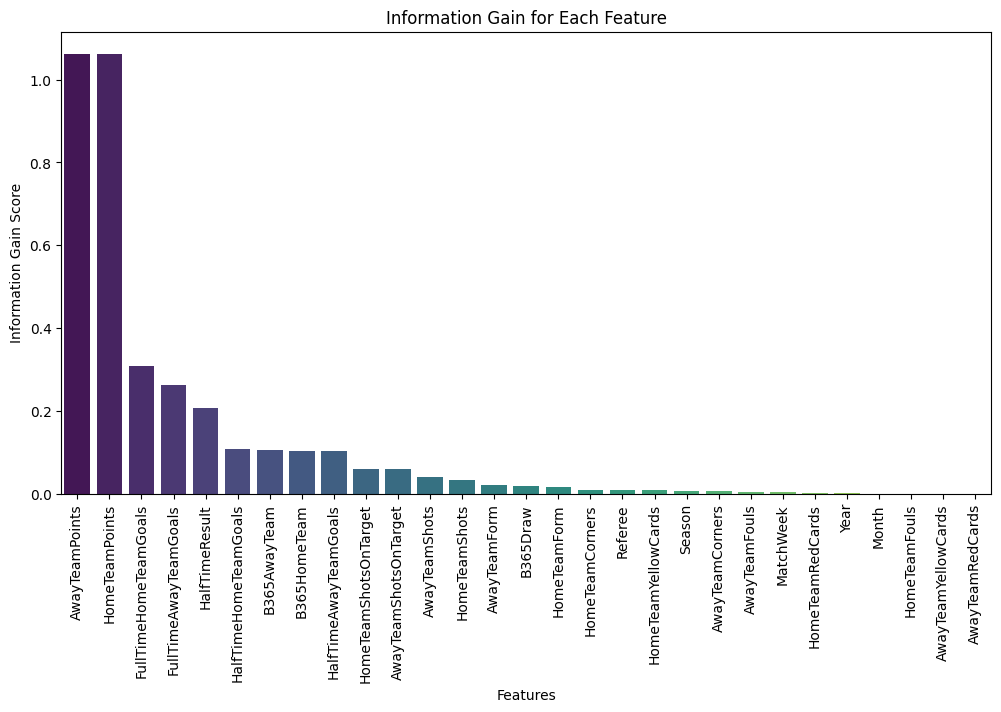


Chi-Square Test Scores:
AwayTeamPoints           12006.755245
HomeTeamPoints            8965.390728
FullTimeAwayTeamGoals     4081.444881
FullTimeHomeTeamGoals     3930.104316
B365AwayTeam              3281.985521
HalfTimeHomeTeamGoals     1700.760371
HalfTimeAwayTeamGoals     1670.899683
B365HomeTeam              1588.712690
HalfTimeResult            1557.242020
HomeTeamShotsOnTarget     1530.483659
AwayTeamShotsOnTarget     1479.759180
AwayTeamShots             1178.098888
HomeTeamShots              857.529894
AwayTeamForm               632.286665
HomeTeamForm               407.008774
HomeTeamRedCards           154.876210
HomeTeamYellowCards        116.774074
B365Draw                   106.488642
Referee                     89.591136
Season                      83.580896
AwayTeamRedCards            73.419102
HomeTeamCorners             55.594380
MatchWeek                   44.194203
AwayTeamFouls               43.462793
AwayTeamCorners             34.599049
AwayTeamYellowCards      

<ipython-input-172-c8d7e52c9eba>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chi2_series.index, y=chi2_series.values, palette='plasma')


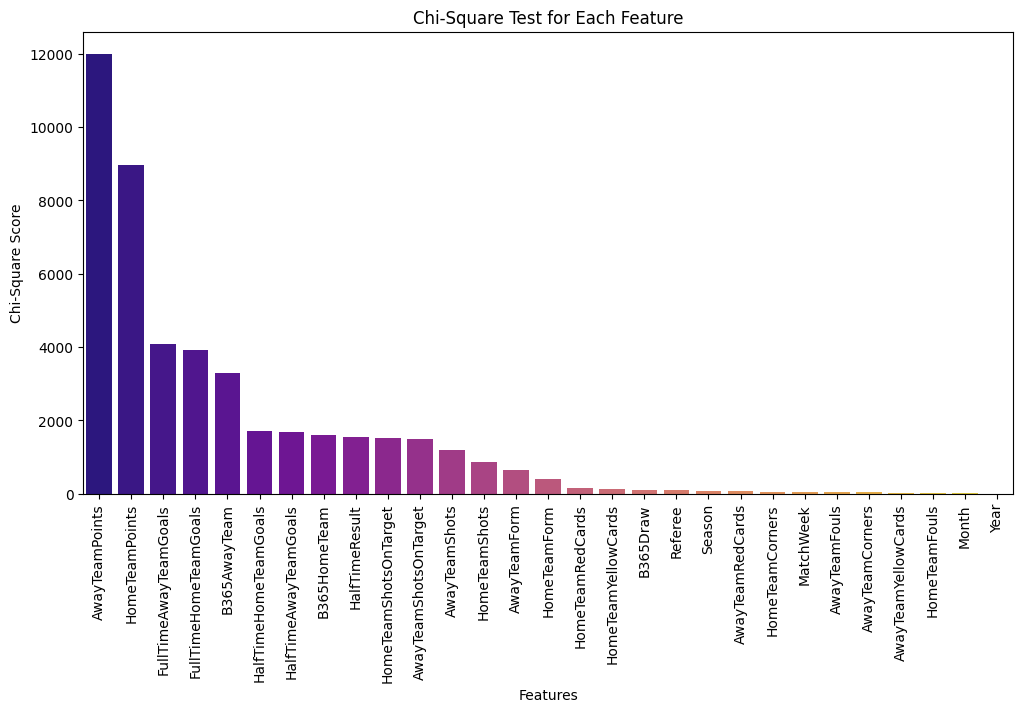

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
<ipython-input-172-c8d7e52c9eba>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fisher_score_series.index, y=fisher_score_series.values, palette='magma')



Fisher’s Score (ANOVA F-value) Scores:
HomeTeamPoints                   inf
AwayTeamPoints                   inf
FullTimeAwayTeamGoals    3130.356389
FullTimeHomeTeamGoals    3047.874207
HalfTimeResult           2341.586683
HalfTimeHomeTeamGoals    1046.631256
HalfTimeAwayTeamGoals     999.380241
B365HomeTeam              673.414984
B365AwayTeam              560.003737
AwayTeamShotsOnTarget     498.474347
HomeTeamShotsOnTarget     464.908437
AwayTeamShots             309.175776
HomeTeamShots             212.806433
B365Draw                  157.346805
AwayTeamForm              157.193906
HomeTeamForm              135.667566
HomeTeamRedCards           76.480576
HomeTeamYellowCards        59.564938
AwayTeamRedCards           37.514280
HomeTeamCorners            17.444578
AwayTeamFouls              17.251069
AwayTeamYellowCards        15.841975
AwayTeamCorners            10.974179
Season                     10.926441
Year                       10.594580
HomeTeamFouls              10.34420

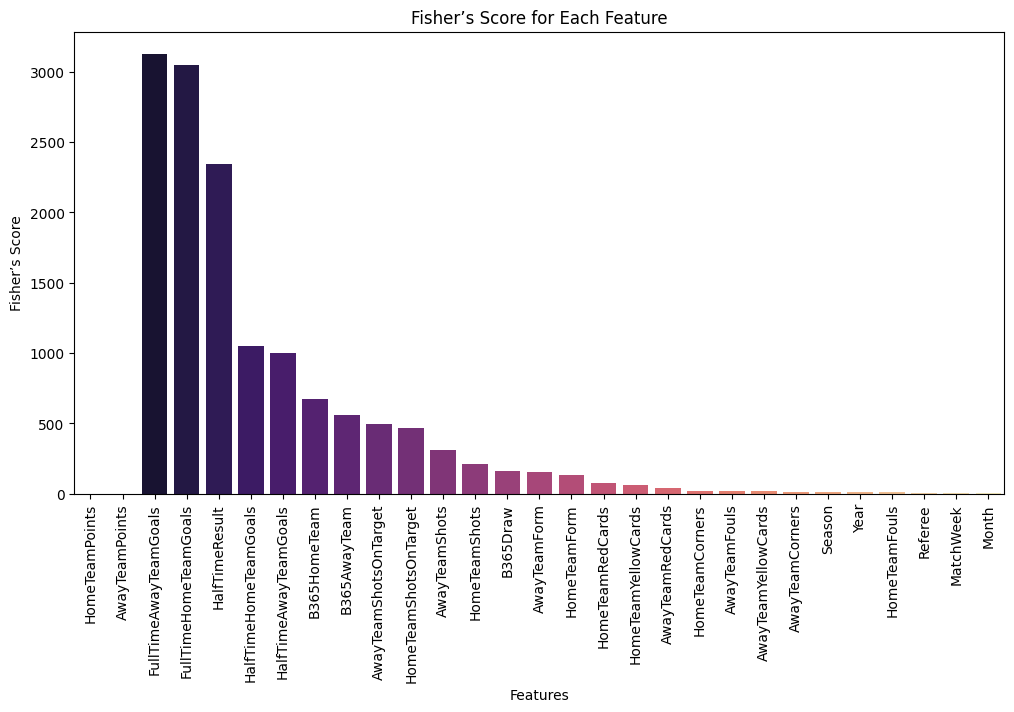


Correlation Coefficient Scores:
HomeTeamPoints           0.986796
AwayTeamPoints           0.985796
FullTimeAwayTeamGoals    0.635229
FullTimeHomeTeamGoals    0.628107
HalfTimeResult           0.599168
HalfTimeHomeTeamGoals    0.432322
HalfTimeAwayTeamGoals    0.425712
B365HomeTeam             0.366267
B365AwayTeam             0.340629
AwayTeamShotsOnTarget    0.320506
HomeTeamShotsOnTarget    0.313300
AwayTeamShots            0.260287
HomeTeamShots            0.219949
AwayTeamForm             0.189385
HomeTeamForm             0.176921
B365Draw                 0.163893
HomeTeamRedCards         0.133577
HomeTeamYellowCards      0.113535
AwayTeamRedCards         0.093826
HomeTeamCorners          0.054724
AwayTeamCorners          0.049978
Season                   0.037853
AwayTeamFouls            0.036444
Year                     0.035963
HomeTeamFouls            0.032520
AwayTeamYellowCards      0.029340
Referee                  0.021789
MatchWeek                0.021466
Month          

<ipython-input-172-c8d7e52c9eba>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_target.index, y=correlation_target.values, palette='coolwarm')


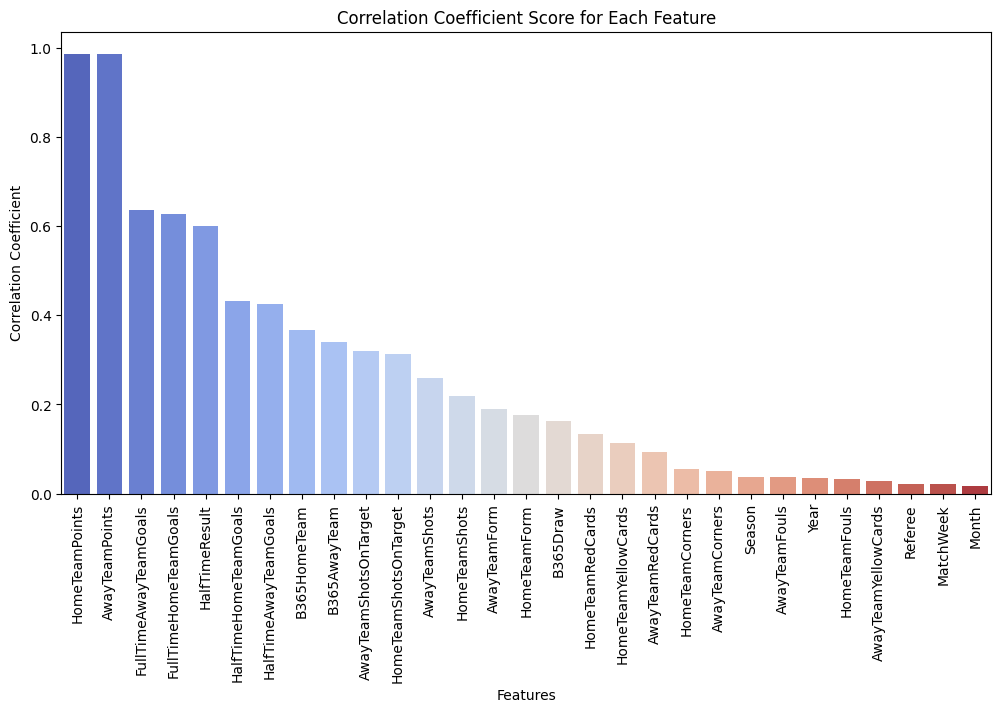


Top 10 Features Selected by K-Highest Scores:
FullTimeHomeTeamGoals    0.308612
FullTimeAwayTeamGoals    0.262088
HalfTimeHomeTeamGoals    0.107120
HalfTimeAwayTeamGoals    0.102510
HalfTimeResult           0.206844
AwayTeamShotsOnTarget    0.059308
B365HomeTeam             0.103092
B365AwayTeam             0.105241
HomeTeamPoints           1.062705
AwayTeamPoints           1.062944
dtype: float64


<ipython-input-172-c8d7e52c9eba>:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=k_best_scores.index, y=k_best_scores.values, palette='cividis')


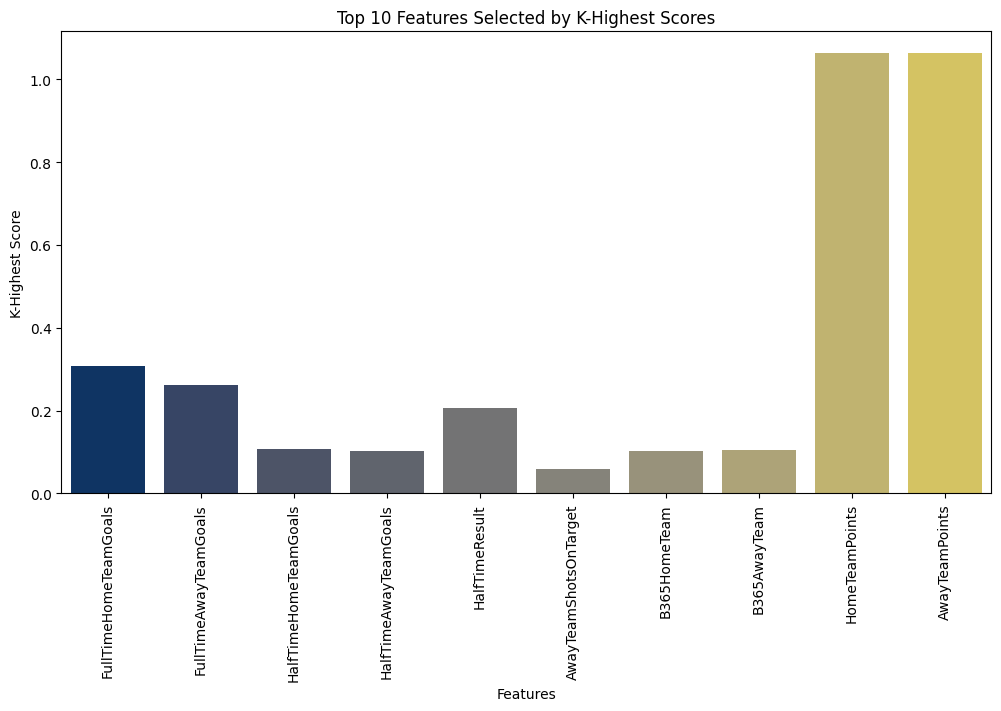

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler



# Convert categorical columns to numerical values
# Assuming 'data' is the DataFrame with categorical columns

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()

# Find categorical columns in the dataset
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Apply label encoding to each categorical column
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# After encoding, separate features and target
X = data.drop('FullTimeResult', axis=1)  # Features
y = data['FullTimeResult']  # Target

# 1. Information Gain (Mutual Information)
mutual_info = mutual_info_classif(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)
print("Information Gain Scores:")
print(mutual_info_series)

# Plot Information Gain
plt.figure(figsize=(12, 6))
sns.barplot(x=mutual_info_series.index, y=mutual_info_series.values, palette='viridis')
plt.title('Information Gain for Each Feature')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Information Gain Score')
plt.show()

# 2. Chi-Square Test
chi2_values, p_values = chi2(X, y)
chi2_series = pd.Series(chi2_values, index=X.columns).sort_values(ascending=False)
print("\nChi-Square Test Scores:")
print(chi2_series)

# Plot Chi-Square Test
plt.figure(figsize=(12, 6))
sns.barplot(x=chi2_series.index, y=chi2_series.values, palette='plasma')
plt.title('Chi-Square Test for Each Feature')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Chi-Square Score')
plt.show()

# 3. Fisher’s Score (ANOVA F-value)
fisher_score = f_classif(X, y)[0]
fisher_score_series = pd.Series(fisher_score, index=X.columns).sort_values(ascending=False)
print("\nFisher’s Score (ANOVA F-value) Scores:")
print(fisher_score_series)

# Plot Fisher’s Score
plt.figure(figsize=(12, 6))
sns.barplot(x=fisher_score_series.index, y=fisher_score_series.values, palette='magma')
plt.title('Fisher’s Score for Each Feature')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Fisher’s Score')
plt.show()

# 4. Correlation Coefficient Score
# Calculate correlation matrix
corr_matrix = data.corr()
correlation_target = corr_matrix['FullTimeResult'].drop('FullTimeResult')
correlation_target = correlation_target.abs().sort_values(ascending=False)
print("\nCorrelation Coefficient Scores:")
print(correlation_target)

# Plot Correlation Coefficient
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_target.index, y=correlation_target.values, palette='coolwarm')
plt.title('Correlation Coefficient Score for Each Feature')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

# 5. K-Highest Scores using SelectKBest
k = 10  # Number of top features to select
select_k_best = SelectKBest(mutual_info_classif, k=k)
select_k_best.fit(X, y)
selected_features = X.columns[select_k_best.get_support()]

# Get the scores of the selected features
k_best_scores = mutual_info_series[selected_features]
print(f"\nTop {k} Features Selected by K-Highest Scores:")
print(k_best_scores)

# Plot the top K features based on K-Highest Scores
plt.figure(figsize=(12, 6))
sns.barplot(x=k_best_scores.index, y=k_best_scores.values, palette='cividis')
plt.title(f'Top {k} Features Selected by K-Highest Scores')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('K-Highest Score')
plt.show()


In [173]:
filtered_data_frame

,Season,MatchWeek,Year,Month,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,...,HomeTeamRedCards,AwayTeamRedCards,B365HomeTeam,B365Draw,B365AwayTeam,HomeTeamPoints,AwayTeamPoints,FullTimeResult,HomeTeamForm,AwayTeamForm
0,2002-2003,1,2002,8,Blackburn,Sunderland,0,0,0.0,0.0,...,0.0,0.0,1.727,3.25,4.333,1,1,D,0,0
1,2002-2003,1,2002,8,Charlton,Chelsea,2,3,2.0,1.0,...,1.0,0.0,2.800,3.25,2.200,0,3,A,0,0
2,2002-2003,1,2002,8,Everton,Tottenham,2,2,1.0,0.0,...,0.0,0.0,2.250,3.25,2.750,1,1,D,0,0
3,2002-2003,1,2002,8,Fulham,Bolton,4,1,3.0,1.0,...,0.0,0.0,1.727,3.25,4.333,3,0,H,0,0
4,2002-2003,1,2002,8,Leeds,Man City,3,0,2.0,0.0,...,0.0,0.0,1.667,3.40,4.500,3,0,H,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8355,2023-2024,38,2024,5,Crystal Palace,Aston Villa,5,0,2.0,0.0,...,0.0,0.0,1.850,4.33,3.600,3,0,H,10,7
8356,2023-2024,38,2024,5,Liverpool,Wolves,2,0,2.0,0.0,...,0.0,1.0,1.170,8.00,15.000,3,0,H,10,2
8357,2023-2024,38,2024,5,Luton,Fulham,2,4,1.0,2.0,...,0.0,0.0,2.900,3.90,2.200,0,3,A,5,5
8358,2023-2024,38,2024,5,Man City,West Ham,3,1,2.0,1.0,...,0.0,0.0,1.080,12.00,21.000,3,0,H,13,6


In [174]:
final_columns = [
    'HomeTeam',
    'AwayTeam',
    'HalfTimeHomeTeamGoals',
    'HalfTimeAwayTeamGoals',
    'Referee',
    'HomeTeamShots',
    'AwayTeamShots',
    'HomeTeamShotsOnTarget',
    'AwayTeamShotsOnTarget',
    'HomeTeamRedCards',
    'AwayTeamRedCards',
    'B365HomeTeam',
    'B365Draw',
    'B365AwayTeam',
    'HomeTeamForm',
    'AwayTeamForm',
    'FullTimeResult'
]

In [175]:
filtered_data_frame = filtered_data_frame[final_columns]
filtered_data_frame .head()

,HomeTeam,AwayTeam,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,Referee,HomeTeamShots,AwayTeamShots,HomeTeamShotsOnTarget,AwayTeamShotsOnTarget,HomeTeamRedCards,AwayTeamRedCards,B365HomeTeam,B365Draw,B365AwayTeam,HomeTeamForm,AwayTeamForm,FullTimeResult
0,Blackburn,Sunderland,0.0,0.0,D Elleray,15.0,7.0,5.0,3.0,0.0,0.0,1.727,3.25,4.333,0,0,D
1,Charlton,Chelsea,2.0,1.0,G Barber,5.0,21.0,5.0,12.0,1.0,0.0,2.800,3.25,2.200,0,0,A
2,Everton,Tottenham,1.0,0.0,N Barry,13.0,10.0,9.0,5.0,0.0,0.0,2.250,3.25,2.750,0,0,D
3,Fulham,Bolton,3.0,1.0,A Wiley,13.0,3.0,6.0,1.0,0.0,0.0,1.727,3.25,4.333,0,0,H
4,Leeds,Man City,2.0,0.0,G Poll,13.0,18.0,8.0,10.0,0.0,0.0,1.667,3.40,4.500,0,0,H


<ipython-input-176-34c3d06eceec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_frame['FullTimeResult'] = label_encoder.fit_transform(filtered_data_frame['FullTimeResult'])


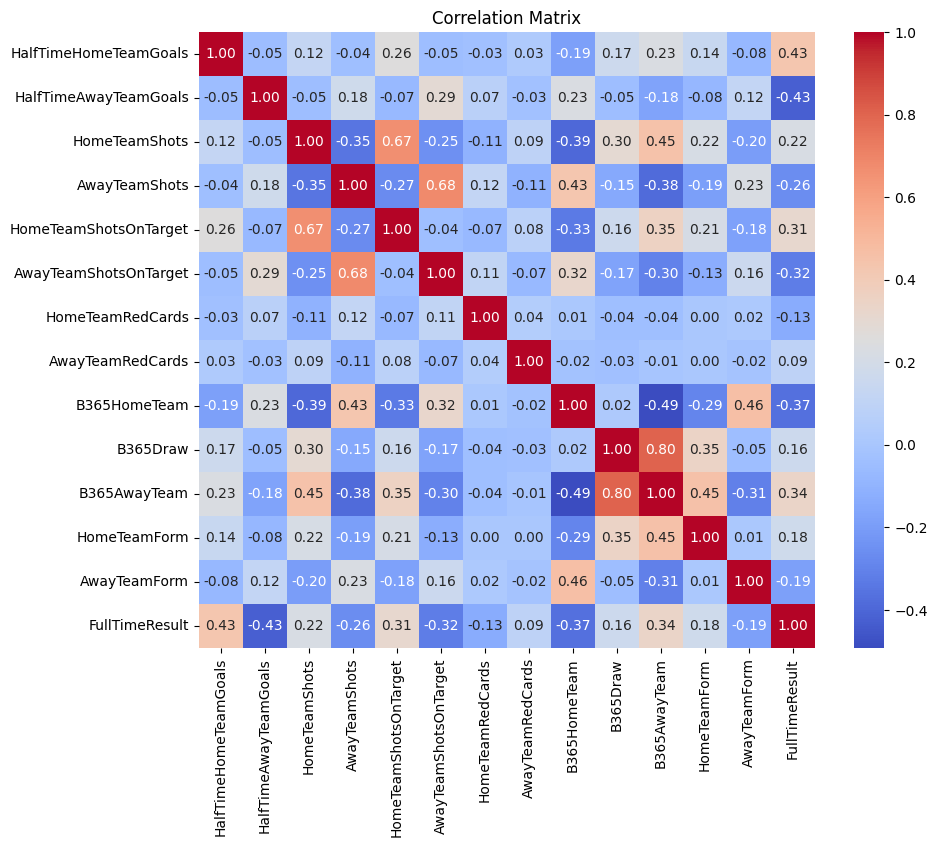

In [176]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
label_encoder = LabelEncoder()

# Encode the 'Result' column
filtered_data_frame['FullTimeResult'] = label_encoder.fit_transform(filtered_data_frame['FullTimeResult'])


numeric_df = filtered_data_frame.select_dtypes(include=['float64', 'int64'])


correlation_matrix = numeric_df.corr()


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

In [177]:
filtered_data_frame.head()

,HomeTeam,AwayTeam,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,Referee,HomeTeamShots,AwayTeamShots,HomeTeamShotsOnTarget,AwayTeamShotsOnTarget,HomeTeamRedCards,AwayTeamRedCards,B365HomeTeam,B365Draw,B365AwayTeam,HomeTeamForm,AwayTeamForm,FullTimeResult
0,Blackburn,Sunderland,0.0,0.0,D Elleray,15.0,7.0,5.0,3.0,0.0,0.0,1.727,3.25,4.333,0,0,1
1,Charlton,Chelsea,2.0,1.0,G Barber,5.0,21.0,5.0,12.0,1.0,0.0,2.800,3.25,2.200,0,0,0
2,Everton,Tottenham,1.0,0.0,N Barry,13.0,10.0,9.0,5.0,0.0,0.0,2.250,3.25,2.750,0,0,1
3,Fulham,Bolton,3.0,1.0,A Wiley,13.0,3.0,6.0,1.0,0.0,0.0,1.727,3.25,4.333,0,0,2
4,Leeds,Man City,2.0,0.0,G Poll,13.0,18.0,8.0,10.0,0.0,0.0,1.667,3.40,4.500,0,0,2


In [178]:
filtered_data_frame.reset_index(drop=True, inplace=True)

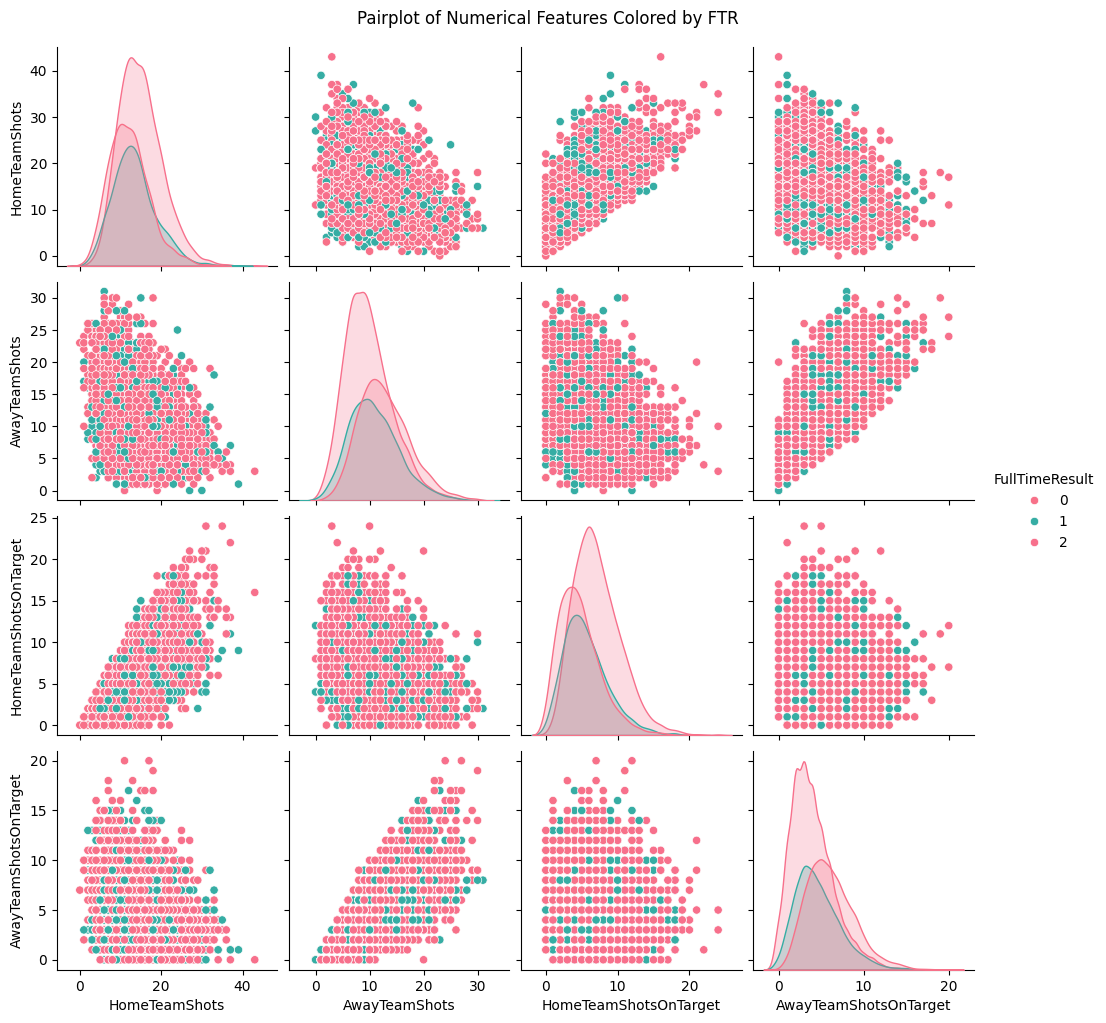

In [179]:
numerical_cols = ['HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget']

    # Create a pairplot for numerical features with 'FTR' as the hue
sns.pairplot(filtered_data_frame, hue='FullTimeResult', vars=numerical_cols, palette='husl')

# Show the plot
plt.suptitle("Pairplot of Numerical Features Colored by FTR", y=1.02)
plt.show()

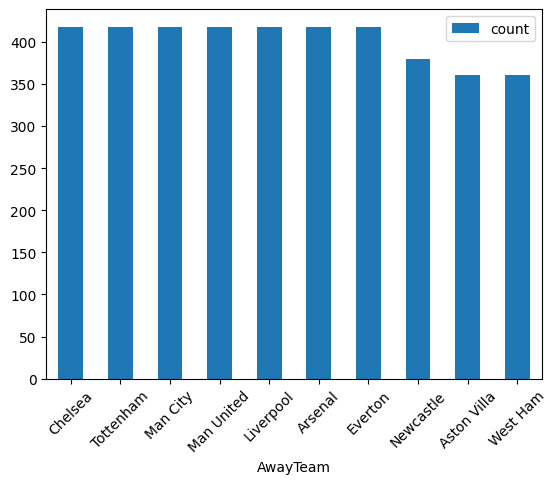

In [180]:
filtered_data_frame['AwayTeam'].value_counts().reset_index().head(10).plot(kind='bar',x='AwayTeam',y='count')
plt.xticks(rotation=45)
plt.show()

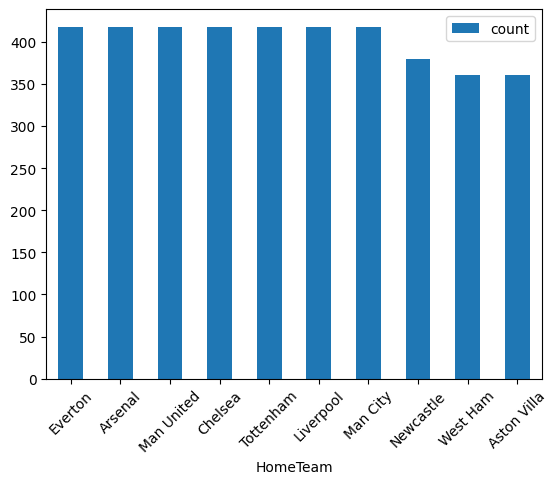

In [181]:
filtered_data_frame['HomeTeam'].value_counts().reset_index().head(10).plot(kind='bar',x='HomeTeam',y='count')
plt.xticks(rotation=45)
plt.show()

In [182]:
dummy_teams = pd.get_dummies(filtered_data_frame[['HomeTeam', 'AwayTeam']])
df_cleaned = pd.concat([filtered_data_frame, dummy_teams], axis=1)
df_cleaned.drop(['HomeTeam', 'AwayTeam'], axis=1, inplace=True)

In [183]:
df_cleaned.head()

,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,Referee,HomeTeamShots,AwayTeamShots,HomeTeamShotsOnTarget,AwayTeamShotsOnTarget,HomeTeamRedCards,AwayTeamRedCards,B365HomeTeam,...,AwayTeam_Southampton,AwayTeam_Stoke,AwayTeam_Sunderland,AwayTeam_Swansea,AwayTeam_Tottenham,AwayTeam_Watford,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wigan,AwayTeam_Wolves
0,0.0,0.0,D Elleray,15.0,7.0,5.0,3.0,0.0,0.0,1.727,...,False,False,True,False,False,False,False,False,False,False
1,2.0,1.0,G Barber,5.0,21.0,5.0,12.0,1.0,0.0,2.800,...,False,False,False,False,False,False,False,False,False,False
2,1.0,0.0,N Barry,13.0,10.0,9.0,5.0,0.0,0.0,2.250,...,False,False,False,False,True,False,False,False,False,False
3,3.0,1.0,A Wiley,13.0,3.0,6.0,1.0,0.0,0.0,1.727,...,False,False,False,False,False,False,False,False,False,False
4,2.0,0.0,G Poll,13.0,18.0,8.0,10.0,0.0,0.0,1.667,...,False,False,False,False,False,False,False,False,False,False


In [184]:
df_full_result =  df_cleaned['FullTimeResult']
df_cleaned = df_cleaned.drop('FullTimeResult',axis = 1)
df_cleaned['FullTimeResult'] = df_full_result

In [185]:
df_cleaned

,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,Referee,HomeTeamShots,AwayTeamShots,HomeTeamShotsOnTarget,AwayTeamShotsOnTarget,HomeTeamRedCards,AwayTeamRedCards,B365HomeTeam,...,AwayTeam_Stoke,AwayTeam_Sunderland,AwayTeam_Swansea,AwayTeam_Tottenham,AwayTeam_Watford,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wigan,AwayTeam_Wolves,FullTimeResult
0,0.0,0.0,D Elleray,15.0,7.0,5.0,3.0,0.0,0.0,1.727,...,False,True,False,False,False,False,False,False,False,1
1,2.0,1.0,G Barber,5.0,21.0,5.0,12.0,1.0,0.0,2.800,...,False,False,False,False,False,False,False,False,False,0
2,1.0,0.0,N Barry,13.0,10.0,9.0,5.0,0.0,0.0,2.250,...,False,False,False,True,False,False,False,False,False,1
3,3.0,1.0,A Wiley,13.0,3.0,6.0,1.0,0.0,0.0,1.727,...,False,False,False,False,False,False,False,False,False,2
4,2.0,0.0,G Poll,13.0,18.0,8.0,10.0,0.0,0.0,1.667,...,False,False,False,False,False,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8355,2.0,0.0,D Bond,15.0,8.0,9.0,2.0,0.0,0.0,1.850,...,False,False,False,False,False,False,False,False,False,2
8356,2.0,0.0,C Kavanagh,36.0,4.0,14.0,3.0,0.0,1.0,1.170,...,False,False,False,False,False,False,False,False,True,2
8357,1.0,2.0,M Donohue,15.0,15.0,6.0,7.0,0.0,0.0,2.900,...,False,False,False,False,False,False,False,False,False,0
8358,2.0,1.0,J Brooks,28.0,3.0,12.0,2.0,0.0,0.0,1.080,...,False,False,False,False,False,False,True,False,False,2


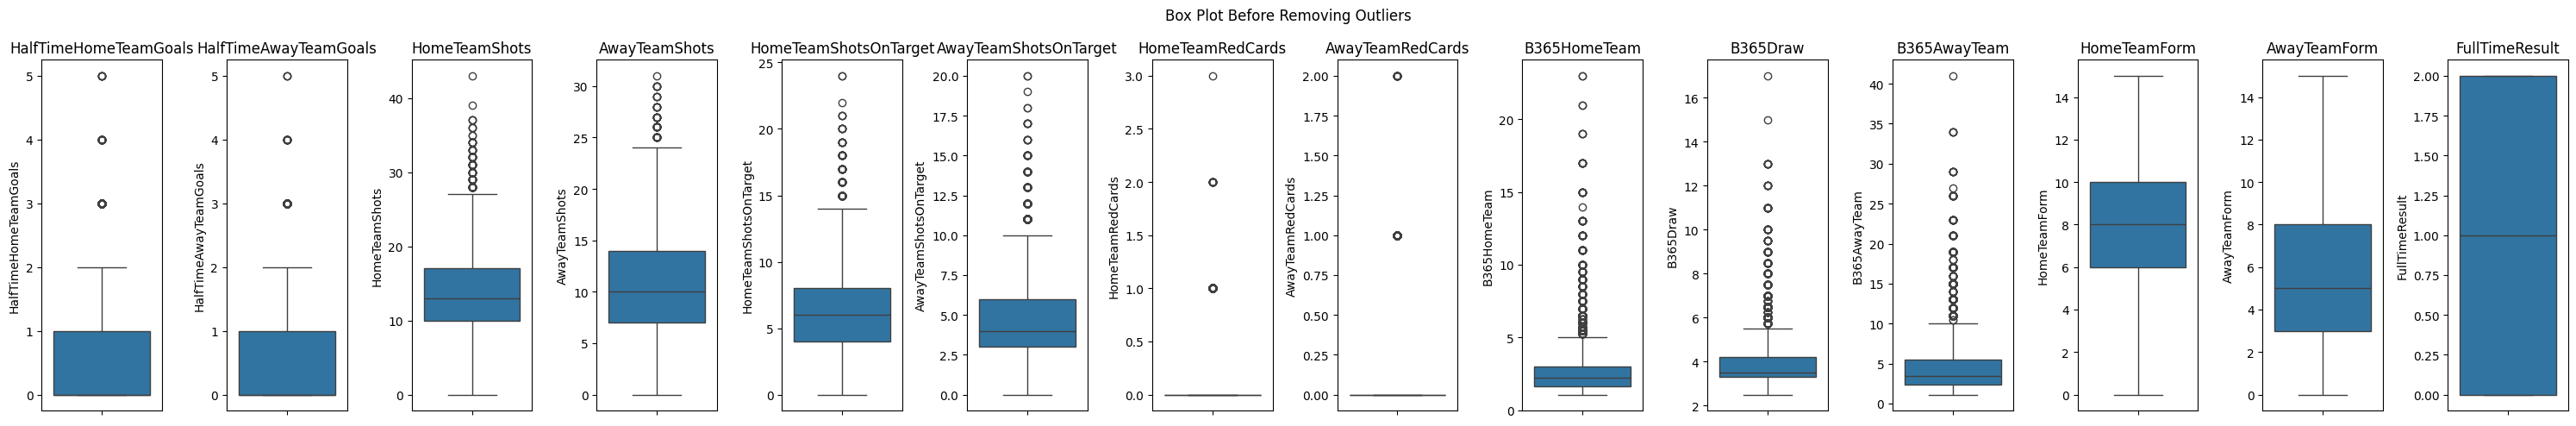

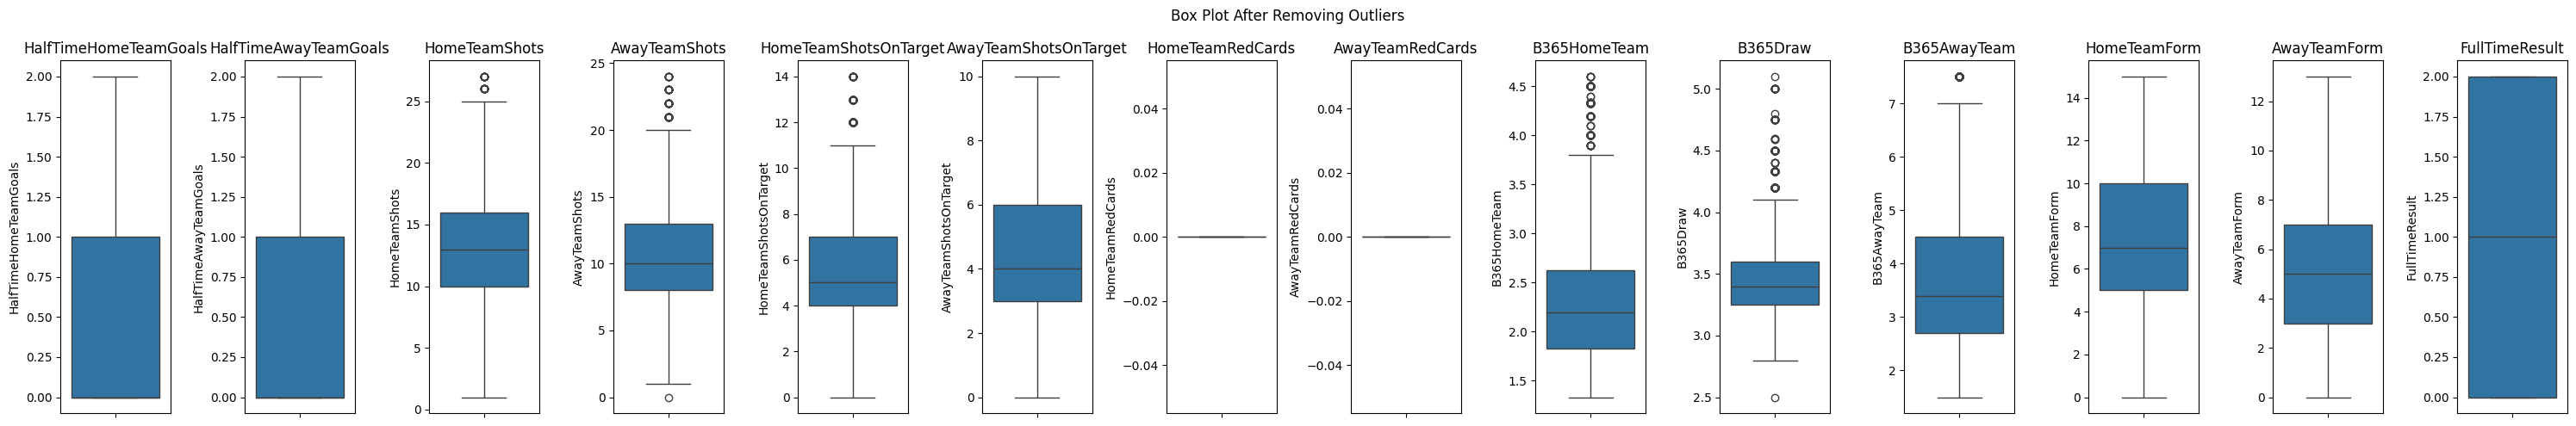

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots(data, title):
    numerical_columns = data.select_dtypes(include=[np.number]).columns
    num_cols = len(numerical_columns)

    plt.figure(figsize=(30, 5))

    for i, column in enumerate(numerical_columns):
        plt.subplot(1, num_cols, i + 1)
        sns.boxplot(data[column])
        plt.title(column)
        plt.xticks(rotation=45)

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


plot_boxplots(df_cleaned, "Box Plot Before Removing Outliers")


def remove_outliers(data):
    data_cleaned = data.copy()

    for column in data_cleaned.select_dtypes(include=[np.number]).columns:
        Q1 = data_cleaned[column].quantile(0.25)
        Q3 = data_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        data_cleaned = data_cleaned[(data_cleaned[column] >= lower_bound) & (data_cleaned[column] <= upper_bound)]

    return data_cleaned


df_cleaned = remove_outliers(df_cleaned)


plot_boxplots(df_cleaned, "Box Plot After Removing Outliers")


In [133]:
def standardize_data(data):
    scaler = StandardScaler()
    numerical_columns = data.select_dtypes(include=[np.number]).columns

    # Standardizing the numerical columns
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    return data

df_full_result =  df_cleaned['FullTimeResult']
df_cleaned = df_cleaned.drop('FullTimeResult',axis = 1)

# Standardize the cleaned DataFrame
df_standardized = standardize_data(df_cleaned)
df_standardized ['FullTimeResult'] = df_full_result

In [134]:
df_standardized

,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,Referee,HomeTeamShots,AwayTeamShots,HomeTeamShotsOnTarget,AwayTeamShotsOnTarget,HomeTeamRedCards,AwayTeamRedCards,B365HomeTeam,...,AwayTeam_Stoke,AwayTeam_Sunderland,AwayTeam_Swansea,AwayTeam_Tottenham,AwayTeam_Watford,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wigan,AwayTeam_Wolves,FullTimeResult
0,-0.846439,-0.711561,D Elleray,0.404433,-0.892178,-0.239155,-0.626066,0.0,0.0,-0.873553,...,False,True,False,False,False,False,False,False,False,1
2,0.603985,-0.711561,N Barry,-0.044874,-0.132916,1.178083,0.249186,0.0,0.0,-0.139780,...,False,False,False,True,False,False,False,False,False,1
4,2.054409,-0.711561,G Poll,-0.044874,1.891781,0.823774,2.437315,0.0,0.0,-0.957734,...,False,False,False,False,False,False,False,False,False,2
6,-0.846439,-0.711561,B Knight,-0.269527,0.120171,-0.239155,0.249186,0.0,0.0,-0.139780,...,False,False,False,False,False,False,False,False,False,1
8,-0.846439,-0.711561,A D'Urso,-0.494180,0.373258,-0.239155,0.686812,0.0,0.0,0.912476,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8352,-0.846439,-0.711561,C Pawson,0.853740,0.120171,-0.947774,-0.188440,0.0,0.0,-0.280081,...,False,False,False,False,False,False,False,False,False,0
8353,-0.846439,2.482018,G Scott,1.527700,0.373258,-0.947774,0.686812,0.0,0.0,0.912476,...,False,False,False,False,False,False,False,False,False,0
8354,0.603985,-0.711561,A Taylor,0.629086,2.904130,0.115154,0.249186,0.0,0.0,-1.262187,...,False,False,False,False,False,False,False,False,False,2
8355,2.054409,-0.711561,D Bond,0.404433,-0.639091,1.178083,-1.063692,0.0,0.0,-0.700983,...,False,False,False,False,False,False,False,False,False,2


In [135]:
# Step 4: One-Hot Encoding for the 'Referee' column
def one_hot_encode_referee(data):
    # One-hot encode the 'Referee' column
    data_encoded = pd.get_dummies(data, columns=['Referee'], drop_first=True)
    return data_encoded

# Apply one-hot encoding
df_final = one_hot_encode_referee(df_standardized)

# Display the DataFrame after one-hot encoding
print("\nDataFrame After One-Hot Encoding:")
df_final.head()


DataFrame After One-Hot Encoding:


,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,HomeTeamShots,AwayTeamShots,HomeTeamShotsOnTarget,AwayTeamShotsOnTarget,HomeTeamRedCards,AwayTeamRedCards,B365HomeTeam,B365Draw,...,Referee_T Bramall,Referee_T Harrington,Referee_T Robinson,Referee_U Rennie,Referee_l Mason,Referee_�A D'Urso,Referee_�C Foy,Referee_�D Gallagher,Referee_�M Atkinson,Referee_�U Rennie
0,-0.846439,-0.711561,0.404433,-0.892178,-0.239155,-0.626066,0.0,0.0,-0.873553,-0.738906,...,False,False,False,False,False,False,False,False,False,False
2,0.603985,-0.711561,-0.044874,-0.132916,1.178083,0.249186,0.0,0.0,-0.139780,-0.738906,...,False,False,False,False,False,False,False,False,False,False
4,2.054409,-0.711561,-0.044874,1.891781,0.823774,2.437315,0.0,0.0,-0.957734,-0.292367,...,False,False,False,False,False,False,False,False,False,False
6,-0.846439,-0.711561,-0.269527,0.120171,-0.239155,0.249186,0.0,0.0,-0.139780,-0.738906,...,False,False,False,False,False,False,False,False,False,False
8,-0.846439,-0.711561,-0.494180,0.373258,-0.239155,0.686812,0.0,0.0,0.912476,-0.738906,...,False,False,False,False,False,False,False,False,False,False


In [136]:
df_full_result =  df_final['FullTimeResult']
df_final = df_final.drop('FullTimeResult',axis = 1)
df_final['FullTimeResult'] = df_full_result

In [137]:
df_final.head()

,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,HomeTeamShots,AwayTeamShots,HomeTeamShotsOnTarget,AwayTeamShotsOnTarget,HomeTeamRedCards,AwayTeamRedCards,B365HomeTeam,B365Draw,...,Referee_T Harrington,Referee_T Robinson,Referee_U Rennie,Referee_l Mason,Referee_�A D'Urso,Referee_�C Foy,Referee_�D Gallagher,Referee_�M Atkinson,Referee_�U Rennie,FullTimeResult
0,-0.846439,-0.711561,0.404433,-0.892178,-0.239155,-0.626066,0.0,0.0,-0.873553,-0.738906,...,False,False,False,False,False,False,False,False,False,1
2,0.603985,-0.711561,-0.044874,-0.132916,1.178083,0.249186,0.0,0.0,-0.139780,-0.738906,...,False,False,False,False,False,False,False,False,False,1
4,2.054409,-0.711561,-0.044874,1.891781,0.823774,2.437315,0.0,0.0,-0.957734,-0.292367,...,False,False,False,False,False,False,False,False,False,2
6,-0.846439,-0.711561,-0.269527,0.120171,-0.239155,0.249186,0.0,0.0,-0.139780,-0.738906,...,False,False,False,False,False,False,False,False,False,1
8,-0.846439,-0.711561,-0.494180,0.373258,-0.239155,0.686812,0.0,0.0,0.912476,-0.738906,...,False,False,False,False,False,False,False,False,False,0


In [138]:
import pandas as pd
import numpy as np
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Sample DataFrame (replace with your actual dataset)
# df_final = pd.read_csv('your_file.csv')  # Load your DataFrame

# Dropping rows with missing values
X_in_match = df_final.drop('FullTimeResult', axis=1).dropna()  # Features
y_in_match = df_final['FullTimeResult'].loc[X_in_match.index]  # Target aligned with X

# Check the class distribution before SMOTE
print(f"Class distribution before SMOTE: {Counter(y_in_match)}")

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_in_match, y_in_match)

# Check the class distribution after SMOTE
print(f"Class distribution after SMOTE: {Counter(y_resampled)}")


Class distribution before SMOTE: Counter({2: 2097, 1: 1339, 0: 1290})
Class distribution after SMOTE: Counter({1: 2097, 2: 2097, 0: 2097})


<Figure size 600x400 with 0 Axes>

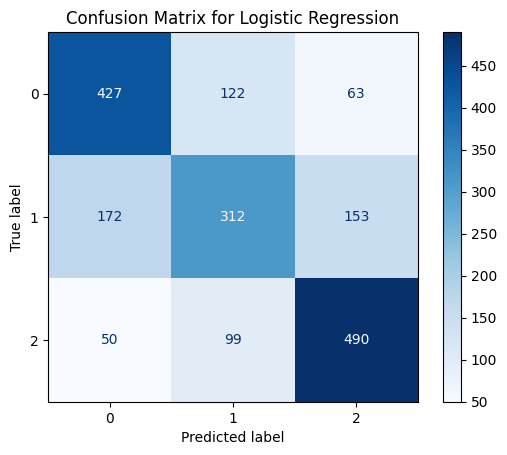

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       612
           1       0.59      0.49      0.53       637
           2       0.69      0.77      0.73       639

    accuracy                           0.65      1888
   macro avg       0.65      0.65      0.65      1888
weighted avg       0.65      0.65      0.65      1888



<Figure size 600x400 with 0 Axes>

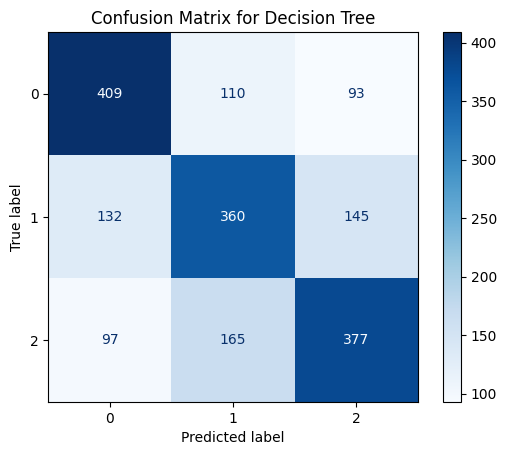

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.64      0.67      0.65       612
           1       0.57      0.57      0.57       637
           2       0.61      0.59      0.60       639

    accuracy                           0.61      1888
   macro avg       0.61      0.61      0.61      1888
weighted avg       0.61      0.61      0.61      1888



<Figure size 600x400 with 0 Axes>

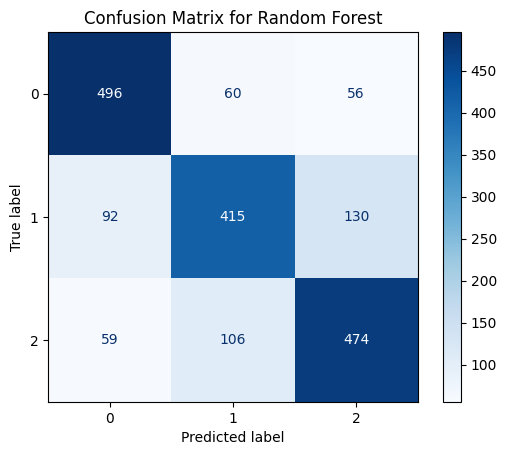

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       612
           1       0.71      0.65      0.68       637
           2       0.72      0.74      0.73       639

    accuracy                           0.73      1888
   macro avg       0.73      0.73      0.73      1888
weighted avg       0.73      0.73      0.73      1888



<Figure size 600x400 with 0 Axes>

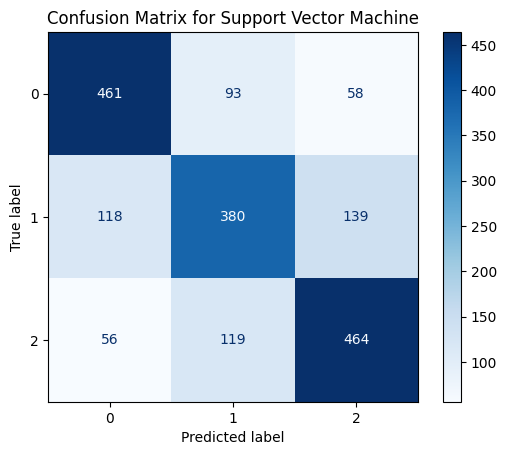

Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       612
           1       0.64      0.60      0.62       637
           2       0.70      0.73      0.71       639

    accuracy                           0.69      1888
   macro avg       0.69      0.69      0.69      1888
weighted avg       0.69      0.69      0.69      1888



<Figure size 600x400 with 0 Axes>

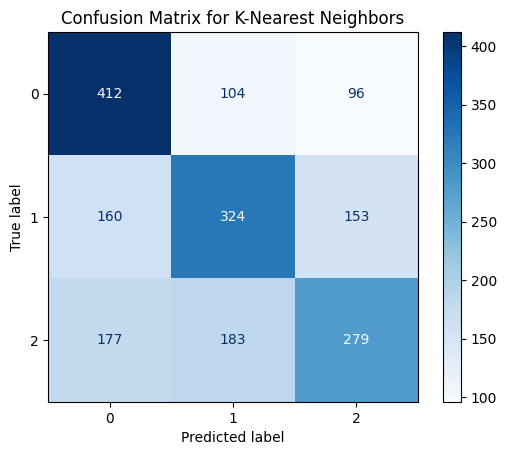

Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.55      0.67      0.61       612
           1       0.53      0.51      0.52       637
           2       0.53      0.44      0.48       639

    accuracy                           0.54      1888
   macro avg       0.54      0.54      0.53      1888
weighted avg       0.54      0.54      0.53      1888



<Figure size 600x400 with 0 Axes>

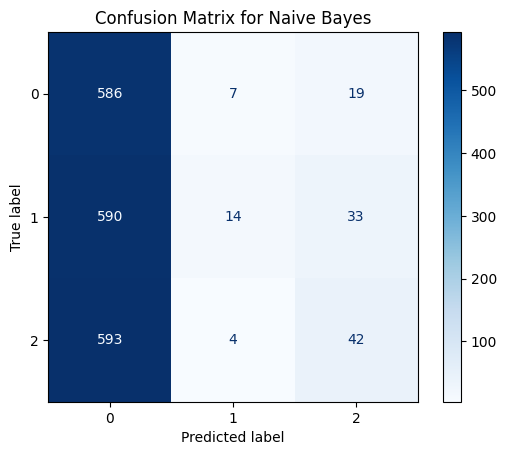

Classification Report for Naive Bayes:

              precision    recall  f1-score   support

           0       0.33      0.96      0.49       612
           1       0.56      0.02      0.04       637
           2       0.45      0.07      0.11       639

    accuracy                           0.34      1888
   macro avg       0.45      0.35      0.22      1888
weighted avg       0.45      0.34      0.21      1888



<Figure size 600x400 with 0 Axes>

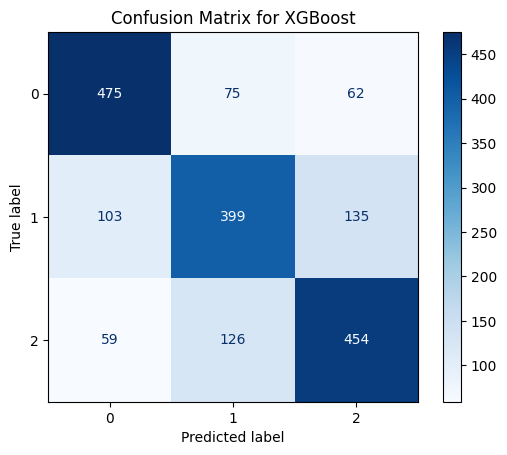

Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       612
           1       0.67      0.63      0.65       637
           2       0.70      0.71      0.70       639

    accuracy                           0.70      1888
   macro avg       0.70      0.70      0.70      1888
weighted avg       0.70      0.70      0.70      1888



In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.3, random_state=42)

# Step 2: Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Define classifiers to test, including XGBoost
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier( eval_metric='logloss')  # XGBoost classifier
}

# Step 4: Loop through classifiers, fit and evaluate
for name, clf in classifiers.items():
    # Fit the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    # Print classification report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))


In [140]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


rf_param_grid = {
    'n_estimators': np.arange(50, 200, 10),
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None] + list(np.arange(10, 30, 5)),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 5),
    'bootstrap': [True, False]
}


rf_model = RandomForestClassifier(random_state=42)


rf_random_search = RandomizedSearchCV(estimator=rf_model,
                                       param_distributions=rf_param_grid,
                                       n_iter=100,
                                       cv=3,
                                       verbose=2,
                                       random_state=42,
                                       n_jobs=-1)


rf_random_search.fit(X_resampled, y_resampled)


print("Best parameters for Random Forest:", rf_random_search.best_params_)
print("Best cross-validated score for Random Forest:", rf_random_search.best_score_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for Random Forest: {'n_estimators': 140, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Best cross-validated score for Random Forest: 0.6965506278810999


In [187]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV


xgb_param_grid = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': np.arange(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5, 1]
}


xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)


xgb_random_search = RandomizedSearchCV(estimator=xgb_model,
                                        param_distributions=xgb_param_grid,
                                        n_iter=100,
                                        cv=3,
                                        verbose=2,
                                        random_state=42,
                                        n_jobs=-1)


xgb_random_search.fit(X_resampled, y_resampled)


print("Best parameters for XGBoost:", xgb_random_search.best_params_)
print("Best cross-validated score for XGBoost:", xgb_random_search.best_score_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for XGBoost: {'subsample': 0.6, 'n_estimators': 180, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}
Best cross-validated score for XGBoost: 0.6502940708949292


Random Forest Cross-Validation Accuracy: 0.7372 ± 0.0135
XGBoost Cross-Validation Accuracy: 0.7199 ± 0.0072
Models have been saved as 'best_random_forest_model.pkl' and 'best_xgboost_model.pkl'.


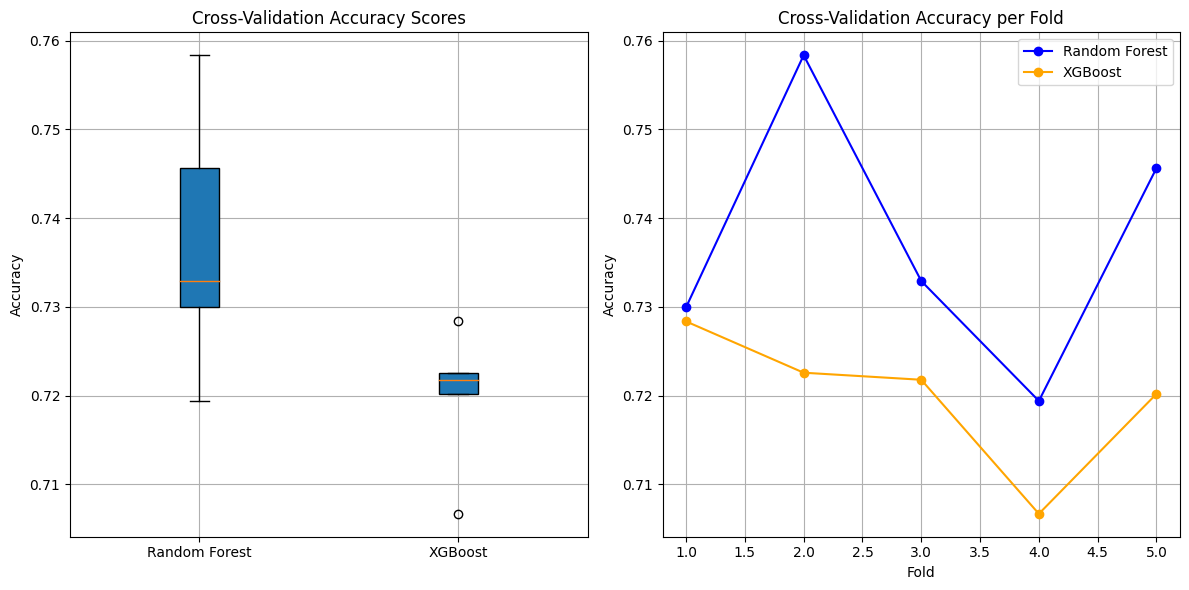

In [145]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


rf_model = RandomForestClassifier(**rf_random_search.best_params_, random_state=42)

xgb_model = XGBClassifier(**xgb_random_search.best_params_, eval_metric='logloss', random_state=42)


rf_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=skf, scoring='accuracy')
xgb_scores = cross_val_score(xgb_model, X_resampled, y_resampled, cv=skf, scoring='accuracy')


print(f"Random Forest Cross-Validation Accuracy: {np.mean(rf_scores):.4f} ± {np.std(rf_scores):.4f}")
print(f"XGBoost Cross-Validation Accuracy: {np.mean(xgb_scores):.4f} ± {np.std(xgb_scores):.4f}")


rf_model.fit(X_resampled, y_resampled)
xgb_model.fit(X_resampled, y_resampled)


joblib.dump(rf_model, 'best_random_forest_model.pkl')
joblib.dump(xgb_model, 'best_xgboost_model.pkl')

print("Models have been saved as 'best_random_forest_model.pkl' and 'best_xgboost_model.pkl'.")


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot([rf_scores, xgb_scores], labels=['Random Forest', 'XGBoost'], patch_artist=True)
plt.title('Cross-Validation Accuracy Scores')
plt.ylabel('Accuracy')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(range(1, len(rf_scores) + 1), rf_scores, marker='o', linestyle='-', color='blue', label='Random Forest')
plt.plot(range(1, len(xgb_scores) + 1), xgb_scores, marker='o', linestyle='-', color='orange', label='XGBoost')
plt.title('Cross-Validation Accuracy per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()
